In [1100]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
import geopandas as gpd
import matplotlib.pyplot as plt
import sys
import math
from tqdm import tqdm
import datetime
import movingpandas as mpd

Loading BokehJS ...

In [6]:
df_pmi = pd.read_excel('Dataset Lainnya.xlsx',sheet_name='PMI GLOBAL')

In [9]:
df_pmi.head()

,TANGGAL,INDONESIA,CHINA,JAPAN,THAILAND,MALAYSIA,VIETNAM,INDIA,USA,UK,GLOBAL,UEZONE
0,2018-12-31,51.2,49.7,52.6,50.3,46.8,53.8,53.2,54.8,54.3,51.4,51.4
1,2019-01-31,49.9,48.3,50.3,50.2,47.9,51.9,53.9,55.7,52.8,50.6,50.5
2,2019-02-28,50.1,49.9,48.9,49.9,47.6,51.2,54.3,54.2,52.1,50.5,49.3
3,2019-03-31,51.2,50.8,49.2,50.3,47.2,51.9,52.6,55.3,55.1,50.5,47.5
4,2019-04-30,50.4,50.2,50.2,51.0,49.4,52.5,51.8,53.6,53.1,50.5,47.9


In [10]:
df_pmi = df_pmi.set_index('TANGGAL')

<AxesSubplot:title={'center':'PMI GLOBAL'}, xlabel='Tanggal'>

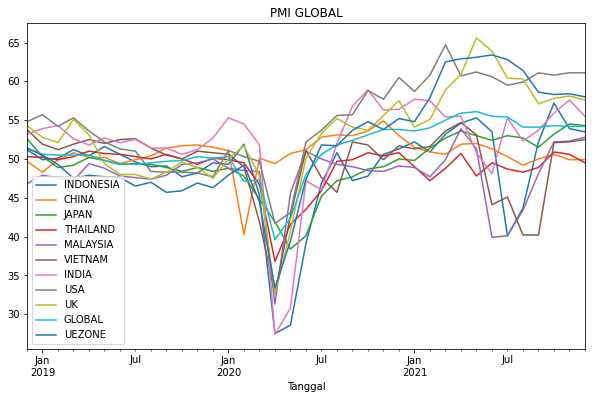

In [11]:
df_pmi.plot(title='PMI GLOBAL', xlabel = 'Tanggal', figsize=(10,6))

In [12]:
df_pmi.plot_bokeh.line()

Figure(id='1003', ...)

In [1096]:
def haversine(lon1, lat1,lon2,lat2):
    R = 6371000  # radius bumi
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  
    return meters

In [1182]:
df_pl = pd.read_csv("Peduli_Lindungi_Checkin_Hackathon.csv", sep='|')

In [1234]:
df_pr = pd.read_csv(f"provinsi.csv")

In [1235]:
df_pr

,Unnamed: 0,province_dagri_code,province_name
0,58,12,SUMATERA UTARA
1,221,14,RIAU
2,7313,15,JAMBI
3,2,16,SUMATERA SELATAN
4,1288,18,LAMPUNG
5,14349,19,KEPULAUAN BANGKA BELITUNG
6,23,21,KEPULAUAN RIAU
7,6287,31,DKI JAKARTA
8,1,32,JAWA BARAT
9,22,33,JAWA TENGAH


In [1184]:
df_pl.head()

,nik_hashed,user_covid19_status,gender,checkin_timestamp,checkout_timestamp,province_dagri_code,province_name,city_dagri_code,city_name,outlet_category,outlet_sub_category,user_color_status
0,93e255c026f7f4ed4a663daf884daac4a3caec8e569f4e...,NOT POSITIVE,MALE,2022-03-28 12:24:26 UTC,2022-03-28 12:40:57 UTC,34,DAERAH ISTIMEWA YOGYAKARTA,3404,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
1,0fdffd869355f5473f4ef62a18ba15ae49aaa6131be12d...,NOT POSITIVE,FEMALE,2022-03-28 12:26:16 UTC,2022-03-28 17:59:50 UTC,32,JAWA BARAT,3201,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN
2,2b84a93837c40487dc60b0a02b9f5e7db5c6519c4d95d2...,NOT POSITIVE,MALE,2022-03-28 12:52:00 UTC,2022-03-28 13:55:52 UTC,16,SUMATERA SELATAN,1671,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN
3,681b4354b148a8424a69a8956a06d840b2fccd0d79821f...,NOT POSITIVE,MALE,2022-03-28 12:53:13 UTC,2022-03-28 13:28:30 UTC,34,DAERAH ISTIMEWA YOGYAKARTA,3404,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
4,965891cbdd3406e1f421361874fdbe3550c52b6647923f...,NOT POSITIVE,MALE,2022-03-28 12:55:17 UTC,2022-03-28 12:55:22 UTC,32,JAWA BARAT,3271,KOTA BOGOR,PERBELANJAAN,MALL,GREEN


In [661]:
df_pl.user_covid19_status.unique()

array(['NOT POSITIVE'], dtype=object)

<AxesSubplot:>

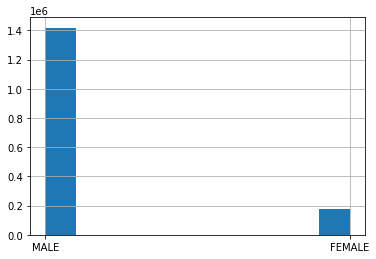

In [662]:
df_pl.gender.hist()

In [663]:
%%time
df_pl['checkin_timestamp'] = pd.to_datetime(list(df_pl.checkin_timestamp.str[:-4]), format='%Y-%m-%d %H:%M:%S')

Wall time: 2.52 s


In [664]:
%%time
df_pl['checkout_timestamp'] = pd.to_datetime(list(df_pl.checkout_timestamp.str[:-4]), format='%Y-%m-%d %H:%M:%S')

Wall time: 2.53 s


In [665]:
df_pl.province_dagri_code.unique()

array([34, 32, 16, 36, 35, 51, 33, 21, 12, 14, 61, 64, 18, 74, 62, 73, 52,
       53, 31, 15, 19, 92], dtype=int64)

In [666]:
df_pl.province_name.unique()

array(['DAERAH ISTIMEWA YOGYAKARTA', 'JAWA BARAT', 'SUMATERA SELATAN',
       'BANTEN', 'JAWA TIMUR', 'BALI', 'JAWA TENGAH', 'KEPULAUAN RIAU',
       'SUMATERA UTARA', 'RIAU', 'KALIMANTAN BARAT', 'KALIMANTAN TIMUR',
       'LAMPUNG', 'SULAWESI TENGGARA', 'KALIMANTAN TENGAH',
       'SULAWESI SELATAN', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR',
       'DKI JAKARTA', 'JAMBI', 'KEPULAUAN BANGKA BELITUNG', 'PAPUA BARAT'],
      dtype=object)

In [667]:
df_pl.city_dagri_code.unique()

array([3404, 3201, 1671, 3271, 3671, 3573, 3215, 5103, 3525, 3311, 2171,
       1271, 3604, 3507, 3214, 3274, 1471, 3372, 6171, 3471, 1403, 6471,
       3509, 3602, 1871, 3202, 3579, 5104, 6112, 3322, 5108, 3213, 3577,
       3203, 3277, 3673, 3204, 3211, 7471, 3672, 6271, 7371, 5201, 3402,
       3515, 3571, 3517, 5315, 3272, 3302, 5271, 3101, 1505, 3217, 3310,
       1571, 3376, 3305, 6472, 3403, 3502, 3510, 3401, 3308, 3205, 3514,
       5202, 1971, 3303, 1804, 3505, 3276, 3216, 3275, 3273, 5171, 3374,
       3578, 3603, 1275, 3324, 3210, 3371, 9202, 3375, 3319, 1401, 3576,
       3304, 3516, 7309, 3524, 3674, 3173, 3171, 3175, 3172, 3174],
      dtype=int64)

In [668]:
df_pl.city_name.unique()

array(['KAB. SLEMAN', 'KAB. BOGOR', 'KOTA PALEMBANG', 'KOTA BOGOR',
       'KOTA TANGERANG', 'KOTA MALANG', 'KAB. KARAWANG', 'KAB. BADUNG',
       'KAB. GRESIK', 'KAB. SUKOHARJO', 'KOTA BATAM', 'KOTA MEDAN',
       'KAB. SERANG', 'KAB. MALANG', 'KAB. PURWAKARTA', 'KOTA CIREBON',
       'KOTA PEKANBARU', 'KOTA SURAKARTA', 'KOTA PONTIANAK',
       'KOTA YOGYAKARTA', 'KAB. BENGKALIS', 'KOTA BALIKPAPAN',
       'KAB. JEMBER', 'KAB. LEBAK', 'KOTA BANDAR LAMPUNG',
       'KAB. SUKABUMI', 'KOTA BATU', 'KAB. GIANYAR', 'KAB. KUBU RAYA',
       'KAB. SEMARANG', 'KAB. BULELENG', 'KAB. SUBANG', 'KOTA MADIUN',
       'KAB. CIANJUR', 'KOTA CIMAHI', 'KOTA SERANG', 'KAB. BANDUNG',
       'KAB. SUMEDANG', 'KOTA KENDARI', 'KOTA CILEGON',
       'KOTA PALANGKARAYA', 'KOTA MAKASSAR', 'KAB. LOMBOK BARAT',
       'KAB. BANTUL', 'KAB. SIDOARJO', 'KOTA KEDIRI', 'KAB. JOMBANG',
       'KAB. MANGGARAI BARAT', 'KOTA SUKABUMI', 'KAB. BANYUMAS',
       'KOTA MATARAM', 'KAB. ADM. KEP. SERIBU', 'KAB. MUARO JAMBI',
 

In [669]:
df_pl.outlet_category.unique()

array(['PERBELANJAAN', 'MAKANAN & MINUMAN', 'INDUSTRI', 'PERKANTORAN',
       'SARANA TRANSPORTASI', nan, 'SARANA HIBURAN', 'TEMPAT IBADAH',
       'AKOMODASI', 'FASILITAS KESEHATAN', 'SARANA OLAHRAGA',
       'INSTITUSI PENDIDIKAN', 'KECANTIKAN & RELAKSASI'], dtype=object)

In [670]:
df_pl.outlet_sub_category.unique()

array(['MALL', 'RESTORAN', 'PABRIK / REFINERY / PEMBANGKIT',
       'GEDUNG PERKANTORAN SWASTA', 'STASIUN', 'LAINNYA',
       'DEPARTMENT STORE', 'CAFE', 'BIOSKOP', 'BANK', 'BANDARA',
       'TEMPAT WISATA', 'PURA', 'TOKO RITEL', 'NON-IOMKI', 'TAMAN PUBLIK',
       'HOTEL', 'BAR', 'SUPERMARKET', 'RESTORAN CEPAT SAJI',
       'RUMAH SAKIT', 'KANTOR INSTANSI PEMERINTAH', 'GOLF',
       'GEREJA KRISTEN', 'KOMPLEKS PERUMAHAN', 'WARUNG', 'GEREJA KATOLIK',
       'TENANT MALL', nan, 'TERMINAL', 'GELANGGANG OLAHRAGA',
       'OUTLET MANDIRI', 'PELABUHAN', 'UNIVERSITAS / SEKOLAH TINGGI',
       'MINIMARKET', 'AKOMODASI', 'PASAR TRADISIONAL', 'VIHARA',
       'PUSAT KEBUGARAN', 'SENTRA LOGISTIK ATAU DISTRIBUSI',
       'KANTOR POLISI', 'AULA', 'KLINIK', 'SEKOLAH', 'GEDUNG APARTEMEN',
       'STADIUM', 'SARANA OLAHRAGA', 'RESTORAN TRADISIONAL', 'KARAOKE',
       'MUSEUM', 'GALERI SENI', 'TEMPAT IBADAH', 'PERGUDANGAN', 'SPA',
       'PUSKESMAS', 'SALON', 'APOTEK', 'LABORATORIUM', 'LEMBAGA KURSUS'

<AxesSubplot:>

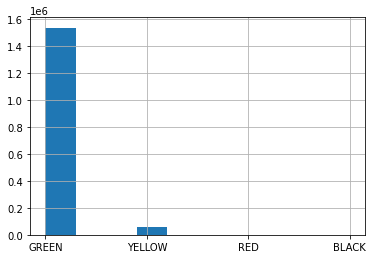

In [671]:
df_pl.user_color_status.hist()

<AxesSubplot:>

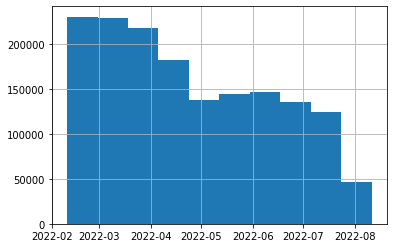

In [672]:
df_pl.checkin_timestamp.hist()

<AxesSubplot:>

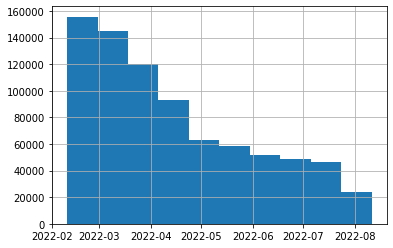

In [673]:
df_pl.checkout_timestamp.hist()

In [1174]:

list(df_pl[['province_dagri_code','province_name']].drop_duplicates().sort_values('province_dagri_code').itertuples(index=False, name=None))

[(12, 'SUMATERA UTARA'),
 (14, 'RIAU'),
 (15, 'JAMBI'),
 (16, 'SUMATERA SELATAN'),
 (18, 'LAMPUNG'),
 (19, 'KEPULAUAN BANGKA BELITUNG'),
 (21, 'KEPULAUAN RIAU'),
 (31, 'DKI JAKARTA'),
 (32, 'JAWA BARAT'),
 (33, 'JAWA TENGAH'),
 (34, 'DAERAH ISTIMEWA YOGYAKARTA'),
 (35, 'JAWA TIMUR'),
 (36, 'BANTEN'),
 (51, 'BALI'),
 (52, 'NUSA TENGGARA BARAT'),
 (53, 'NUSA TENGGARA TIMUR'),
 (61, 'KALIMANTAN BARAT'),
 (62, 'KALIMANTAN TENGAH'),
 (64, 'KALIMANTAN TIMUR'),
 (73, 'SULAWESI SELATAN'),
 (74, 'SULAWESI TENGGARA'),
 (92, 'PAPUA BARAT')]

In [675]:
df_latlong = pd.read_csv('list_location_id_csv.csv')

In [682]:
df_latlong['kabko_id'] = df_latlong.kabko.astype('category').cat.codes

In [684]:
df_latlong[df_latlong.kabko.str.contains('JAKARTA')]

,kabko,lat,long,kabko_id
194,KOTA JAKARTA,-6.1751,106.865,445


In [685]:
df_pl['kabko'] = df_pl['city_name'].str.replace('KOTA ADM. JAKARTA BARAT','KOTA JAKARTA').str.replace('KAB. ADM. KEP. SERIBU','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA PUSAT','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA TIMUR','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA UTARA','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA SELATAN','KOTA JAKARTA')

<ipython-input-685-85f462f7dfa1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pl['kabko'] = df_pl['city_name'].str.replace('KOTA ADM. JAKARTA BARAT','KOTA JAKARTA').str.replace('KAB. ADM. KEP. SERIBU','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA PUSAT','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA TIMUR','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA UTARA','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA SELATAN','KOTA JAKARTA')


In [686]:
df_pl.kabko = df_pl.kabko.astype(str)
df_latlong.kabko = df_latlong.kabko.astype(str)

In [687]:
df = pd.merge(df_pl, 
         df_latlong, 
         how='left', on='kabko')

In [688]:
len(df.nik_hashed.unique())

4085

In [689]:
geo_df = df[['nik_hashed','gender','checkin_timestamp','checkout_timestamp','province_name','kabko','outlet_category','outlet_sub_category','user_color_status','lat','long','kabko_id','province_dagri_code']]

In [690]:
all_gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.long, geo_df.lat))

In [691]:
%%time
indonesia_gdf = gpd.read_file('indonesia.json')
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Wall time: 17.7 s


In [692]:
all_gdf

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,long,kabko_id,geometry
0,93e255c026f7f4ed4a663daf884daac4a3caec8e569f4e...,MALE,2022-03-28 12:24:26,2022-03-28 12:40:57,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,POINT (110.40240 -7.73250)
1,0fdffd869355f5473f4ef62a18ba15ae49aaa6131be12d...,FEMALE,2022-03-28 12:26:16,2022-03-28 17:59:50,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN,-6.5518,106.6291,62,POINT (106.62910 -6.55180)
2,2b84a93837c40487dc60b0a02b9f5e7db5c6519c4d95d2...,MALE,2022-03-28 12:52:00,2022-03-28 13:55:52,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN,-2.9761,104.7754,469,POINT (104.77540 -2.97610)
3,681b4354b148a8424a69a8956a06d840b2fccd0d79821f...,MALE,2022-03-28 12:53:13,2022-03-28 13:28:30,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,POINT (110.40240 -7.73250)
4,965891cbdd3406e1f421361874fdbe3550c52b6647923f...,MALE,2022-03-28 12:55:17,2022-03-28 12:55:22,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN,-6.5971,106.8060,434,POINT (106.80600 -6.59710)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597174,6bab3b46400b3be7fb97dfef46900a291f3660c34419f3...,MALE,2022-08-10 20:10:30,2022-08-10 20:10:40,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,POINT (106.86500 -6.17510)
1597175,c14760038cbc9c26b7787475a323a2e611653627731f91...,MALE,2022-08-10 20:56:25,2022-08-10 20:56:37,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,POINT (106.86500 -6.17510)
1597176,aaaba9edab38b9aa5fdfc12d40b8ba7ffd7416742143c3...,MALE,2022-08-10 20:57:24,2022-08-10 20:57:47,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,POINT (106.86500 -6.17510)
1597177,3c0787b2a569cf6aa59710d7b9dbe91ff518ab0d896ddd...,MALE,2022-08-10 21:08:43,2022-08-10 21:08:43,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,YELLOW,-6.1751,106.8650,445,POINT (106.86500 -6.17510)


In [693]:
all_gdf.set_crs(epsg=4326, inplace=True)

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,long,kabko_id,geometry
0,93e255c026f7f4ed4a663daf884daac4a3caec8e569f4e...,MALE,2022-03-28 12:24:26,2022-03-28 12:40:57,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,POINT (110.40240 -7.73250)
1,0fdffd869355f5473f4ef62a18ba15ae49aaa6131be12d...,FEMALE,2022-03-28 12:26:16,2022-03-28 17:59:50,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN,-6.5518,106.6291,62,POINT (106.62910 -6.55180)
2,2b84a93837c40487dc60b0a02b9f5e7db5c6519c4d95d2...,MALE,2022-03-28 12:52:00,2022-03-28 13:55:52,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN,-2.9761,104.7754,469,POINT (104.77540 -2.97610)
3,681b4354b148a8424a69a8956a06d840b2fccd0d79821f...,MALE,2022-03-28 12:53:13,2022-03-28 13:28:30,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,POINT (110.40240 -7.73250)
4,965891cbdd3406e1f421361874fdbe3550c52b6647923f...,MALE,2022-03-28 12:55:17,2022-03-28 12:55:22,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN,-6.5971,106.8060,434,POINT (106.80600 -6.59710)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597174,6bab3b46400b3be7fb97dfef46900a291f3660c34419f3...,MALE,2022-08-10 20:10:30,2022-08-10 20:10:40,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,POINT (106.86500 -6.17510)
1597175,c14760038cbc9c26b7787475a323a2e611653627731f91...,MALE,2022-08-10 20:56:25,2022-08-10 20:56:37,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,POINT (106.86500 -6.17510)
1597176,aaaba9edab38b9aa5fdfc12d40b8ba7ffd7416742143c3...,MALE,2022-08-10 20:57:24,2022-08-10 20:57:47,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,POINT (106.86500 -6.17510)
1597177,3c0787b2a569cf6aa59710d7b9dbe91ff518ab0d896ddd...,MALE,2022-08-10 21:08:43,2022-08-10 21:08:43,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,YELLOW,-6.1751,106.8650,445,POINT (106.86500 -6.17510)


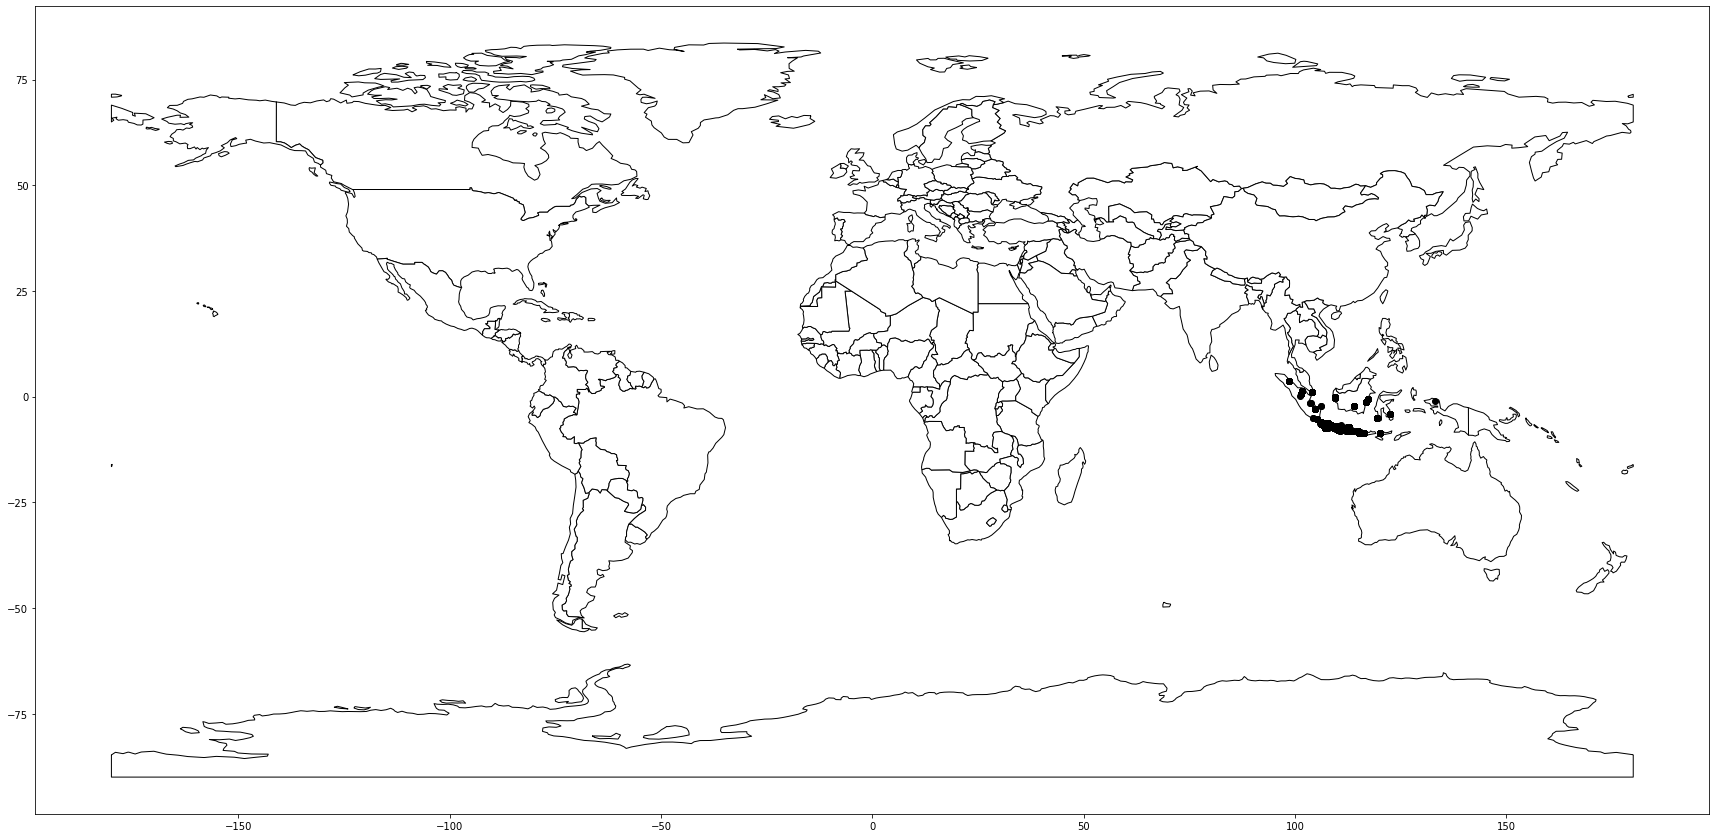

Wall time: 3min 20s


In [155]:
%%time
ax = world_gdf.plot(color='white', edgecolor='black',figsize=(30,30))

all_gdf.plot(ax=ax, color='black')
plt.show()

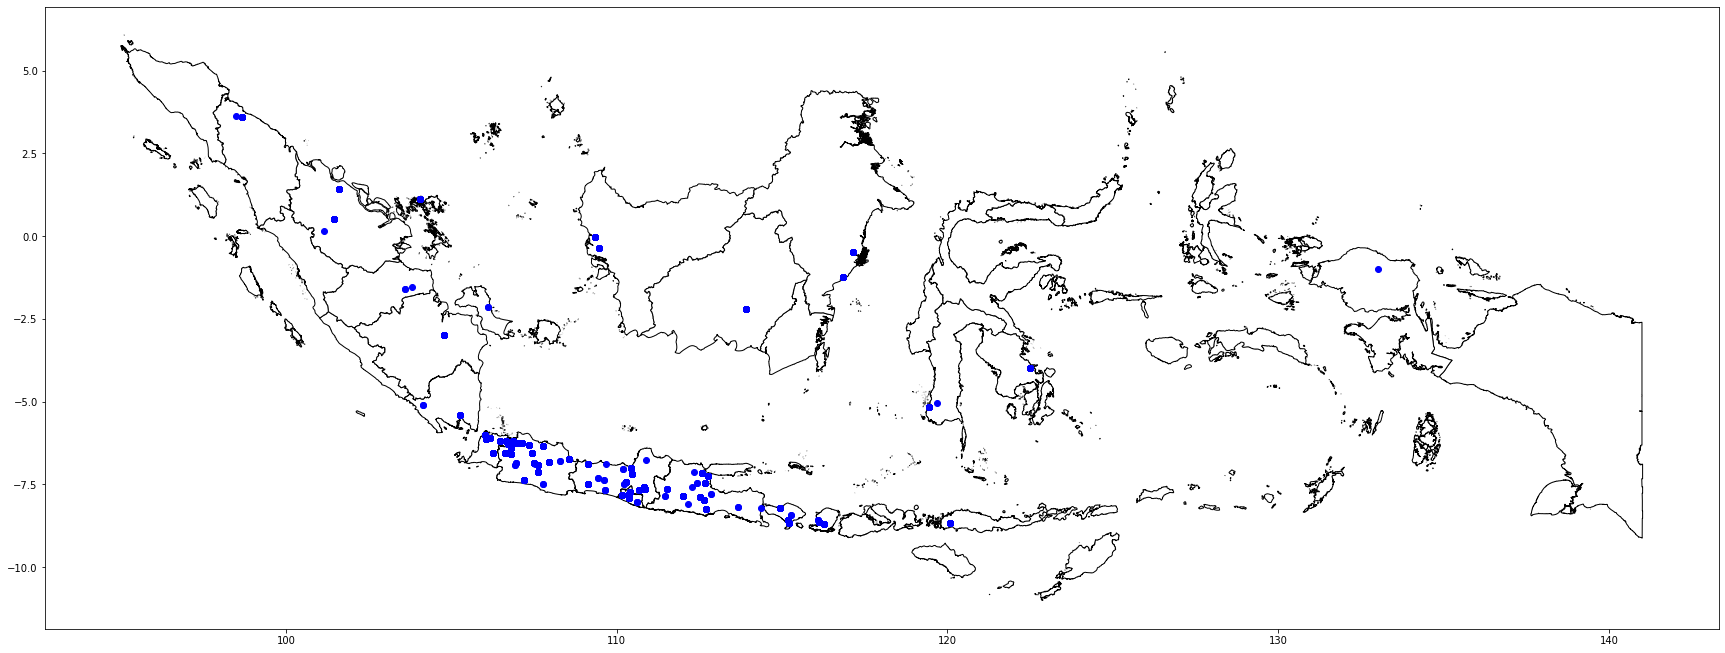

Wall time: 2min 24s


In [694]:
%%time
ax = indonesia_gdf.plot(color='white', edgecolor='black',figsize=(30,30))

all_gdf.plot(ax=ax, color='blue')
plt.show()

In [1179]:
all_gdf['bulan'] = all_gdf.checkin_timestamp.dt.month
all_gdf['hari'] = all_gdf.checkin_timestamp.dt.day
all_gdf['jam'] = all_gdf.checkin_timestamp.dt.hour
all_gdf['menit'] = all_gdf.checkin_timestamp.dt.minute

In [696]:
sort_df = all_gdf.sort_values(['nik_hashed','checkin_timestamp']).copy()

In [967]:
#test_df = sort_df[sort_df.nik_hashed=='fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1ab10cc401081114809c'].copy()
test_df = sort_df.copy()

In [968]:
test_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1597179 entries, 156882 to 321772
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   nik_hashed           1597179 non-null  object        
 1   gender               1592150 non-null  object        
 2   checkin_timestamp    1597179 non-null  datetime64[ns]
 3   checkout_timestamp   805716 non-null   datetime64[ns]
 4   province_name        1597179 non-null  object        
 5   kabko                1597179 non-null  object        
 6   outlet_category      1583287 non-null  object        
 7   outlet_sub_category  1585697 non-null  object        
 8   user_color_status    1597179 non-null  object        
 9   lat                  1597179 non-null  float64       
 10  long                 1597179 non-null  float64       
 11  kabko_id             1597179 non-null  int16         
 12  geometry             1597179 non-null  geome

In [969]:
test_df['next_province_name'] = None
test_df['next_kabko'] = None
test_df['next_lat'] = None
test_df['next_long'] = None
test_df['next_kabko_id'] = None
test_df['next_checkin_timestamp'] = None
test_df['next_outlet_category'] = None
test_df['next_outlet_sub_category'] = None
test_df['next_user_color_status'] = None

In [1127]:
list_unique = []
count = 0
with tqdm(total=test_df['nik_hashed'].count(), file=sys.stdout) as pbar:
    for i, row in enumerate(test_df.itertuples(index=False)):
        if len(list_unique) < 1:
            list_unique.append(row)
        elif ((list_unique[len(list_unique)-1][0] == row.nik_hashed) &
                (list_unique[len(list_unique)-1][4] == row.province_name) &
                (list_unique[len(list_unique)-1][5] == row.kabko)):
                pass
        else:
            if (list_unique[len(list_unique)-1][0] == row.nik_hashed):
                templist = list(list_unique[len(list_unique)-1])
                templist[17] = row.province_name
                templist[18] = row.kabko
                templist[19] = row.lat
                templist[20] = row.long
                templist[21] = int(row.kabko_id)
                templist[22] = row.checkin_timestamp
                templist[23] = row.outlet_category
                templist[24] = row.outlet_sub_category
                templist[25] = row.user_color_status
                list_unique[len(list_unique)-1] = tuple(templist)
            list_unique.append(row)
        count = count+1
        #pbar.set_description('processed: %d' % (count))
        pbar.update(1)
new_df = gpd.GeoDataFrame(list_unique, columns=test_df.columns)
new_df.set_crs(epsg=4326, inplace=True)

100%|█████████████████████████████████████████████████████████████████████| 1597179/1597179 [00:58<00:00, 27075.17it/s]


,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,...,menit,next_province_name,next_kabko,next_lat,next_long,next_kabko_id,next_checkin_timestamp,next_outlet_category,next_outlet_sub_category,next_user_color_status
0,00014146775636351ecb563d3fcb6ac95f23ee0f94fc32...,FEMALE,2022-03-14 19:39:49,NaT,BANTEN,KAB. TANGERANG,PERBELANJAAN,MALL,GREEN,-6.1872,...,39,None,None,NaN,NaN,NaN,NaT,None,None,None
1,001cbf1df4a14437190f9c7faa3b2d39c25e77e3093258...,MALE,2022-02-10 12:34:58,2022-02-10 14:55:06,DKI JAKARTA,KOTA JAKARTA,NaN,NaN,GREEN,-6.1751,...,34,None,None,NaN,NaN,NaN,NaT,None,None,None
2,001dbb2a1f20523ba4e594873d098b2d0bee49f3816b32...,MALE,2022-02-10 08:33:06,2022-02-10 08:41:25,DKI JAKARTA,KOTA JAKARTA,PERKANTORAN,GEDUNG PERKANTORAN SWASTA,GREEN,-6.1751,...,33,None,None,NaN,NaN,NaN,NaT,None,None,None
3,00216648c32a6977f27abf90d51dce6fdf4f603f1ef2ab...,MALE,2022-02-10 10:53:33,2022-02-10 15:05:29,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,53,None,None,NaN,NaN,NaN,NaT,None,None,None
4,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-10 15:04:48,2022-02-10 15:04:59,BANTEN,KAB. TANGERANG,PERBELANJAAN,SUPERMARKET,GREEN,-6.1872,...,4,BANTEN,KOTA TANGERANG SELATAN,-6.2835,106.7113,499.0,2022-02-10 16:05:24,PERBELANJAAN,MALL,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91754,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-28 18:11:45,2022-06-28 18:12:27,BALI,KOTA DENPASAR,PERBELANJAAN,MALL,GREEN,-8.6705,...,11,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-06-28 18:12:27,PERBELANJAAN,MALL,GREEN
91755,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-28 18:12:27,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,12,JAWA BARAT,KOTA BEKASI,-6.2383,106.9756,428.0,2022-07-04 17:14:21,PERBELANJAAN,MALL,GREEN
91756,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-07-04 17:14:21,NaT,JAWA BARAT,KOTA BEKASI,PERBELANJAAN,MALL,GREEN,-6.2383,...,14,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-07-05 10:47:28,PERBELANJAAN,MALL,GREEN
91757,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-07-05 10:47:28,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,47,None,None,NaN,NaN,NaN,NaT,None,None,None


In [1128]:
new_df['kabko_id'] = new_df['kabko_id'].astype(float)

In [1129]:
new_df = new_df[new_df['next_province_name'].notna()].copy()

In [1130]:
#new_df.to_csv("moving_df.csv")

In [1131]:
%%time
new_df['t'] = new_df.checkin_timestamp
new_df['trajectory_id'] = new_df.nik_hashed.astype('category').cat.codes
new_df['duration'] = new_df.next_checkin_timestamp - new_df.checkin_timestamp
new_df['distance_meter'] = new_df.apply(lambda x: haversine(x.long,x.lat,x.next_long,x.next_lat), axis=1)

Wall time: 14.2 s


In [1132]:
new_df.sort_values('duration')

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,...,next_long,next_kabko_id,next_checkin_timestamp,next_outlet_category,next_outlet_sub_category,next_user_color_status,t,trajectory_id,duration,distance_meter
90753,fd0eea2ef809036000af13a64cb274cfdf56ac7174ab5b...,MALE,2022-02-21 10:08:05,2022-02-21 10:08:13,BALI,KOTA DENPASAR,PERBELANJAAN,MALL,GREEN,-8.6705,...,106.8650,445.0,2022-02-21 10:08:05,PERBELANJAAN,MALL,GREEN,2022-02-21 10:08:05,1448,0 days 00:00:00,961260.848420
19592,3596d62de8e834b38275d04c7bbea98b679eeaa9fcc888...,MALE,2022-04-13 11:27:08,NaT,JAWA BARAT,KOTA DEPOK,SARANA TRANSPORTASI,STASIUN,GREEN,-6.4025,...,106.8650,445.0,2022-04-13 11:27:08,PERKANTORAN,KANTOR BUMN,GREEN,2022-04-13 11:27:08,323,0 days 00:00:00,26468.888199
19718,3596d62de8e834b38275d04c7bbea98b679eeaa9fcc888...,MALE,2022-07-12 11:15:26,NaT,JAWA BARAT,KOTA DEPOK,SARANA TRANSPORTASI,STASIUN,GREEN,-6.4025,...,106.7113,499.0,2022-07-12 11:15:27,SARANA HIBURAN,BIOSKOP,GREEN,2022-07-12 11:15:26,323,0 days 00:00:01,16094.298377
36104,6398121fae59d99f25cea558341d27d057a6fddf3ea485...,MALE,2022-06-01 14:22:56,2022-06-01 14:22:57,BANTEN,KOTA TANGERANG,PERBELANJAAN,DEPARTMENT STORE,GREEN,-6.2024,...,106.4877,382.0,2022-06-01 14:22:57,PERBELANJAAN,MALL,GREEN,2022-06-01 14:22:56,577,0 days 00:00:01,18318.169116
76062,d69223fa8e0172263f296c42fded115cc0e8533649f5b9...,FEMALE,2022-03-08 08:35:06,2022-03-08 09:58:56,JAWA BARAT,KOTA BEKASI,SARANA TRANSPORTASI,STASIUN,GREEN,-6.2383,...,106.8650,445.0,2022-03-08 08:35:07,SARANA TRANSPORTASI,STASIUN,GREEN,2022-03-08 08:35:06,1217,0 days 00:00:01,14101.873175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61248,afed0f115610cc66ad68386948d6be76a43ca236a401e9...,MALE,2022-02-10 09:32:13,2022-02-10 11:21:18,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,106.6527,498.0,2022-08-05 09:00:35,SARANA TRANSPORTASI,BANDARA,GREEN,2022-02-10 09:32:13,999,175 days 23:28:22,23664.613888
60604,aee88e0ede2cca91ef930106723d431c64a628e4c21a5a...,MALE,2022-02-10 11:08:44,2022-02-10 11:17:39,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,106.9756,428.0,2022-08-06 12:02:41,PERBELANJAAN,MALL,GREEN,2022-02-10 11:08:44,994,177 days 00:53:57,14101.873175
74031,d24a1053a3c1feeb01f87b74452c973a4f5f7f7cbb5035...,MALE,2022-02-10 12:51:05,2022-02-10 12:51:38,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,112.3338,188.0,2022-08-06 14:01:54,PERKANTORAN,KANTOR INSTANSI PEMERINTAH,GREEN,2022-02-10 12:51:05,1191,177 days 01:10:49,613202.359831
20238,37be5b89ffd673153d82763c1239c03fec1799e6965398...,MALE,2022-02-10 12:49:33,2022-02-10 13:02:50,DKI JAKARTA,KOTA JAKARTA,AKOMODASI,HOTEL,GREEN,-6.1751,...,106.6291,62.0,2022-08-06 18:59:31,PERBELANJAAN,MALL,GREEN,2022-02-10 12:49:33,340,177 days 06:09:58,49336.962399


In [1146]:
proses_df = new_df[~((new_df.duration < datetime.timedelta(minutes=10))&(new_df.distance_meter > 100000))].copy()

In [1211]:
print('DONE 0')
df_pl = pd.read_csv(f"Peduli_Lindungi_Checkin_Hackathon.csv", sep='|')
df_latlong = pd.read_csv(f'list_location_id_csv.csv')
df_latlong['kabko_id'] = df_latlong.kabko.astype('category').cat.codes
df_pl['checkin_timestamp'] = pd.to_datetime(list(df_pl.checkin_timestamp.str[:-4]), format='%Y-%m-%d %H:%M:%S')
df_pl['kabko'] = df_pl['city_name'].str.replace('KOTA ADM. JAKARTA BARAT','KOTA JAKARTA').str.replace('KAB. ADM. KEP. SERIBU','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA PUSAT','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA TIMUR','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA UTARA','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA SELATAN','KOTA JAKARTA')
df_pl.kabko = df_pl.kabko.astype(str)
df_latlong.kabko = df_latlong.kabko.astype(str)
print('DONE 1')
df = pd.merge(df_pl, df_latlong, how='left', on='kabko')
all_gdf = df[['nik_hashed','checkin_timestamp','province_name','kabko','lat','long','kabko_id','province_dagri_code']].copy()
all_gdf['bulan'] = all_gdf.checkin_timestamp.dt.month
all_gdf['hari'] = all_gdf.checkin_timestamp.dt.day
all_gdf['jam'] = all_gdf.checkin_timestamp.dt.hour
all_gdf['menit'] = all_gdf.checkin_timestamp.dt.minute
print('DONE 2')
sort_df = all_gdf.sort_values(['nik_hashed','checkin_timestamp']).copy()
test_df = sort_df.copy()
test_df['next_province_name'] = None
test_df['next_kabko'] = None
test_df['next_lat'] = None
test_df['next_long'] = None
test_df['next_kabko_id'] = None
test_df['next_checkin_timestamp'] = None
test_df['next_province_dagri_code'] = None
print('DONE 3')
list_unique = []
for i, row in enumerate(test_df.itertuples(index=False)):
    if len(list_unique) < 1:
        list_unique.append(row)
    elif ((list_unique[len(list_unique)-1][0] == row.nik_hashed) &
            (list_unique[len(list_unique)-1][2] == row.province_name) &
            (list_unique[len(list_unique)-1][3] == row.kabko)):
            pass
    else:
        if (list_unique[len(list_unique)-1][0] == row.nik_hashed):
            templist = list(list_unique[len(list_unique)-1])
            templist[12] = row.province_name
            templist[13] = row.kabko
            templist[14] = row.lat
            templist[15] = row.long
            templist[16] = int(row.kabko_id)
            templist[17] = row.checkin_timestamp
            templist[18] = int(row.province_dagri_code)
            list_unique[len(list_unique)-1] = tuple(templist)
        list_unique.append(row)
new_df = pd.DataFrame(list_unique, columns=test_df.columns)
print('DONE 4')
new_df = new_df[new_df['next_province_name'].notna()].copy()
new_df['kabko_id'] = new_df['kabko_id'].astype(float)
new_df['t'] = new_df.checkin_timestamp
new_df['trajectory_id'] = new_df.nik_hashed.astype('category').cat.codes
new_df['duration'] = new_df.next_checkin_timestamp - new_df.checkin_timestamp
new_df['distance_meter'] = new_df.apply(lambda x: haversine(x.long,x.lat,x.next_long,x.next_lat), axis=1)

proses_df = new_df[~((new_df.duration < datetime.timedelta(minutes=10))&(new_df.distance_meter > 100000))].copy()
print('DONE 5')

DONE 0


<ipython-input-1211-9a1df9a8dff4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pl['kabko'] = df_pl['city_name'].str.replace('KOTA ADM. JAKARTA BARAT','KOTA JAKARTA').str.replace('KAB. ADM. KEP. SERIBU','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA PUSAT','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA TIMUR','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA UTARA','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA SELATAN','KOTA JAKARTA')


DONE 1
DONE 2
DONE 3
DONE 4
DONE 5


In [1212]:
proses_df.to_csv('proses_data.csv')

In [1213]:
proses_df = pd.read_csv(f'proses_data.csv')

In [1217]:
proses_df['province_dagri_code'] = proses_df['province_dagri_code'].astype(int)
proses_df['next_province_dagri_code'] = proses_df['next_province_dagri_code'].astype(int)

In [1219]:
proses_df

,Unnamed: 0,nik_hashed,checkin_timestamp,province_name,kabko,lat,long,kabko_id,province_dagri_code,bulan,...,next_kabko,next_lat,next_long,next_kabko_id,next_checkin_timestamp,next_province_dagri_code,t,trajectory_id,duration,distance_meter
0,4,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,2022-02-10 15:04:48,BANTEN,KAB. TANGERANG,-6.1872,106.4877,382.0,36,2,...,KOTA TANGERANG SELATAN,-6.2835,106.7113,499.0,2022-02-10 16:05:24,36,2022-02-10 15:04:48,0,0 days 01:00:36,26936.001223
1,5,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,2022-02-10 16:05:24,BANTEN,KOTA TANGERANG SELATAN,-6.2835,106.7113,499.0,36,2,...,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-02-11 15:41:55,31,2022-02-10 16:05:24,0,0 days 23:36:31,20831.205147
2,6,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,2022-02-11 15:41:55,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,31,2,...,KOTA DEPOK,-6.4025,106.7942,441.0,2022-02-11 20:27:40,32,2022-02-11 15:41:55,0,0 days 04:45:45,26468.888199
3,7,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,2022-02-11 20:27:40,JAWA BARAT,KOTA DEPOK,-6.4025,106.7942,441.0,32,2,...,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-02-12 14:50:08,31,2022-02-11 20:27:40,0,0 days 18:22:28,26468.888199
4,8,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,2022-02-12 14:50:08,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,31,2,...,KOTA TANGERANG,-6.2024,106.6527,498.0,2022-02-14 15:09:13,36,2022-02-12 14:50:08,0,2 days 00:19:05,23664.613888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86638,91751,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,2022-06-25 10:33:02,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,31,6,...,KOTA DENPASAR,-8.6705,115.2126,440.0,2022-06-26 19:33:54,51,2022-06-25 10:33:02,1463,1 days 09:00:52,961260.848420
86639,91752,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,2022-06-26 19:33:54,BALI,KOTA DENPASAR,-8.6705,115.2126,440.0,51,6,...,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-06-27 10:52:29,31,2022-06-26 19:33:54,1463,0 days 15:18:35,961260.848420
86640,91753,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,2022-06-27 10:52:29,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,31,6,...,KOTA DENPASAR,-8.6705,115.2126,440.0,2022-06-28 18:11:45,51,2022-06-27 10:52:29,1463,1 days 07:19:16,961260.848420
86641,91755,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,2022-06-28 18:12:27,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,31,6,...,KOTA BEKASI,-6.2383,106.9756,428.0,2022-07-04 17:14:21,32,2022-06-28 18:12:27,1463,5 days 23:01:54,14101.873175


In [1220]:
proses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86643 entries, 0 to 86642
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                86643 non-null  int64  
 1   nik_hashed                86643 non-null  object 
 2   checkin_timestamp         86643 non-null  object 
 3   province_name             86643 non-null  object 
 4   kabko                     86643 non-null  object 
 5   lat                       86643 non-null  float64
 6   long                      86643 non-null  float64
 7   kabko_id                  86643 non-null  float64
 8   province_dagri_code       86643 non-null  int32  
 9   bulan                     86643 non-null  int64  
 10  hari                      86643 non-null  int64  
 11  jam                       86643 non-null  int64  
 12  menit                     86643 non-null  int64  
 13  next_province_name        86643 non-null  object 
 14  next_k

In [1223]:
province_dagri_code = 31

from_jabodetabek_df = proses_df[(proses_df.province_dagri_code == province_dagri_code)].copy()
from_jabodetabek_df = from_jabodetabek_df[(from_jabodetabek_df.next_province_dagri_code != province_dagri_code)].copy()
to_jabodetabek_df = proses_df[(proses_df.next_province_dagri_code == province_dagri_code)].copy()
to_jabodetabek_df = to_jabodetabek_df[(to_jabodetabek_df.province_dagri_code != province_dagri_code)].copy()

move_kotadari_df = from_jabodetabek_df[['trajectory_id','kabko_id','lat','long','next_kabko_id','next_lat','next_long']]
move_kotadari_df = move_kotadari_df.groupby(['kabko_id','lat','long','next_kabko_id','next_lat','next_long']).count()
move_kotadari_df.reset_index(inplace=True)
move_kotadari_df.to_csv('move_kotadari.csv')

move_kotatujuan_df = to_jabodetabek_df[['trajectory_id','kabko_id','lat','long','next_kabko_id','next_lat','next_long']]
move_kotatujuan_df = move_kotatujuan_df.groupby(['kabko_id','lat','long','next_kabko_id','next_lat','next_long']).count()
move_kotatujuan_df.reset_index(inplace=True)
move_kotatujuan_df.to_csv('move_kotatujuan.csv')

kota_dari_df = from_jabodetabek_df[['kabko_id','lat','long','kabko']].drop_duplicates().reset_index(drop=True).copy()
next_kota_dari_df = from_jabodetabek_df[['next_kabko_id','next_lat','next_long','next_kabko']].drop_duplicates().reset_index(drop=True).copy()
next_kota_dari_df.columns = ['kabko_id','lat','long','kabko']
frame = [kota_dari_df,next_kota_dari_df]
kota_dari_df = pd.concat(frame).drop_duplicates().reset_index(drop=True).copy()
kota_dari_df.to_csv('kotadari.csv')

kota_tujuan_df = to_jabodetabek_df[['kabko_id','lat','long','kabko']].drop_duplicates().reset_index(drop=True).copy()
next_kota_tujuan_df = to_jabodetabek_df[['next_kabko_id','next_lat','next_long','next_kabko']].drop_duplicates().reset_index(drop=True).copy()
next_kota_tujuan_df.columns = ['kabko_id','lat','long','kabko']
frame = [kota_tujuan_df,next_kota_tujuan_df]
kota_tujuan_df = pd.concat(frame).drop_duplicates().reset_index(drop=True).copy()
kota_tujuan_df.to_csv('kotatujuan.csv')

top_from_df = from_jabodetabek_df[['trajectory_id','kabko','next_kabko','province_name']].groupby(['province_name','kabko','next_kabko']).count().reset_index().sort_values('trajectory_id', ascending=False)[:10].copy()
top_from_df.to_csv('top_dari.csv')

top_to_df = to_jabodetabek_df[['trajectory_id','kabko','next_kabko','next_province_name']].groupby(['next_province_name','kabko','next_kabko']).count().reset_index().sort_values('trajectory_id', ascending=False)[:10].copy()
top_to_df.to_csv('top_tujuan.csv')

In [1224]:
with pd.option_context('display.max_rows',None):
    print(to_jabodetabek_df[['trajectory_id','kabko','next_kabko','next_province_name']].groupby(['next_province_name','kabko','next_kabko']).count().reset_index().sort_values('trajectory_id', ascending=False)[:10])
    print(from_jabodetabek_df[['trajectory_id','kabko','next_kabko','province_name']].groupby(['province_name','kabko','next_kabko']).count().reset_index().sort_values('trajectory_id', ascending=False)[:10])

   next_province_name                   kabko    next_kabko  trajectory_id
41        DKI JAKARTA           KOTA DENPASAR  KOTA JAKARTA          11297
61        DKI JAKARTA  KOTA TANGERANG SELATAN  KOTA JAKARTA           6962
42        DKI JAKARTA              KOTA DEPOK  KOTA JAKARTA           4274
37        DKI JAKARTA             KOTA BEKASI  KOTA JAKARTA           4173
33        DKI JAKARTA          KAB. TANGERANG  KOTA JAKARTA           2902
7         DKI JAKARTA              KAB. BOGOR  KOTA JAKARTA           2202
60        DKI JAKARTA          KOTA TANGERANG  KOTA JAKARTA           1801
38        DKI JAKARTA              KOTA BOGOR  KOTA JAKARTA           1531
5         DKI JAKARTA             KAB. BEKASI  KOTA JAKARTA           1174
10        DKI JAKARTA           KAB. KARAWANG  KOTA JAKARTA            145
   province_name         kabko              next_kabko  trajectory_id
45   DKI JAKARTA  KOTA JAKARTA           KOTA DENPASAR          11382
69   DKI JAKARTA  KOTA JAKARTA  KOT

In [1014]:
#red_df = new_df[new_df.user_color_status=='RED'].copy()

In [1015]:
from_jabodetabek_df = new_df[(new_df.province_name == 'DKI JAKARTA')].copy()

In [1016]:
from_jabodetabek_df = from_jabodetabek_df[(from_jabodetabek_df.next_province_name != 'DKI JAKARTA')].copy()

In [1017]:
from_jabodetabek_df = from_jabodetabek_df[(from_jabodetabek_df.next_province_name.isin(['BANTEN', 'JAWA BARAT', 'JAWA TENGAH', 'BALI', 'JAWA TIMUR', 'DAERAH ISTIMEWA YOGYAKARTA']))].copy()

In [1018]:
from_jabodetabek_df

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,...,next_lat,next_long,next_kabko_id,next_checkin_timestamp,next_outlet_category,next_outlet_sub_category,next_user_color_status,t,trajectory_id,duration
6,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-11 15:41:55,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.4025,106.7942,441.0,2022-02-11 20:27:40,PERBELANJAAN,SUPERMARKET,GREEN,2022-02-11 15:41:55,0,0 days 04:45:45
8,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-12 14:50:08,2022-02-12 14:51:01,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.2024,106.6527,498.0,2022-02-14 15:09:13,PERBELANJAAN,DEPARTMENT STORE,GREEN,2022-02-12 14:50:08,0,2 days 00:19:05
10,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-14 15:59:24,2022-02-14 16:00:44,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.2835,106.7113,499.0,2022-02-14 18:42:58,PERBELANJAAN,SUPERMARKET,GREEN,2022-02-14 15:59:24,0,0 days 02:43:34
14,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-17 15:43:11,2022-02-17 15:43:50,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.2835,106.7113,499.0,2022-02-19 13:27:01,PERBELANJAAN,SUPERMARKET,GREEN,2022-02-17 15:43:11,0,1 days 21:43:50
18,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-22 15:45:13,2022-02-22 15:45:51,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.2835,106.7113,499.0,2022-02-24 13:21:53,PERBELANJAAN,SUPERMARKET,GREEN,2022-02-22 15:45:13,0,1 days 21:36:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91747,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-19 17:53:26,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.2383,106.9756,428.0,2022-06-20 11:16:39,PERBELANJAAN,MALL,GREEN,2022-06-19 17:53:26,1463,0 days 17:23:13
91749,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-20 12:56:14,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-6.2474,107.1485,44.0,2022-06-25 08:45:01,SARANA HIBURAN,TEMPAT WISATA,GREEN,2022-06-20 12:56:14,1463,4 days 19:48:47
91751,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-25 10:33:02,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-8.6705,115.2126,440.0,2022-06-26 19:33:54,PERBELANJAAN,MALL,GREEN,2022-06-25 10:33:02,1463,1 days 09:00:52
91753,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-27 10:52:29,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,-8.6705,115.2126,440.0,2022-06-28 18:11:45,PERBELANJAAN,MALL,GREEN,2022-06-27 10:52:29,1463,1 days 07:19:16


In [1019]:
to_jabodetabek_df = new_df[(new_df.next_province_name == 'DKI JAKARTA')].copy()

In [1020]:
to_jabodetabek_df = to_jabodetabek_df[(to_jabodetabek_df.province_name != 'DKI JAKARTA')].copy()

In [1021]:
to_jabodetabek_df = to_jabodetabek_df[(to_jabodetabek_df.province_name.isin(['BANTEN', 'JAWA BARAT', 'JAWA TENGAH', 'BALI', 'JAWA TIMUR', 'DAERAH ISTIMEWA YOGYAKARTA']))].copy()

In [1022]:
to_jabodetabek_df

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,...,next_lat,next_long,next_kabko_id,next_checkin_timestamp,next_outlet_category,next_outlet_sub_category,next_user_color_status,t,trajectory_id,duration
5,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-10 16:05:24,2022-02-10 16:05:38,BANTEN,KOTA TANGERANG SELATAN,PERBELANJAAN,MALL,GREEN,-6.2835,...,-6.1751,106.865,445.0,2022-02-11 15:41:55,PERBELANJAAN,MALL,GREEN,2022-02-10 16:05:24,0,0 days 23:36:31
7,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-11 20:27:40,2022-02-11 20:27:52,JAWA BARAT,KOTA DEPOK,PERBELANJAAN,SUPERMARKET,GREEN,-6.4025,...,-6.1751,106.865,445.0,2022-02-12 14:50:08,PERBELANJAAN,MALL,GREEN,2022-02-11 20:27:40,0,0 days 18:22:28
9,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-14 15:09:13,2022-02-14 15:09:25,BANTEN,KOTA TANGERANG,PERBELANJAAN,DEPARTMENT STORE,GREEN,-6.2024,...,-6.1751,106.865,445.0,2022-02-14 15:59:24,PERBELANJAAN,MALL,GREEN,2022-02-14 15:09:13,0,0 days 00:50:11
13,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-16 14:24:43,2022-02-16 14:25:14,BANTEN,KOTA TANGERANG SELATAN,PERBELANJAAN,MALL,GREEN,-6.2835,...,-6.1751,106.865,445.0,2022-02-17 15:43:11,PERBELANJAAN,MALL,GREEN,2022-02-16 14:24:43,0,1 days 01:18:28
17,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-19 15:23:40,2022-02-19 15:23:46,BANTEN,KOTA TANGERANG SELATAN,PERBELANJAAN,SUPERMARKET,GREEN,-6.2835,...,-6.1751,106.865,445.0,2022-02-22 15:45:13,PERBELANJAAN,MALL,GREEN,2022-02-19 15:23:40,0,3 days 00:21:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91748,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-20 11:16:39,NaT,JAWA BARAT,KOTA BEKASI,PERBELANJAAN,MALL,GREEN,-6.2383,...,-6.1751,106.865,445.0,2022-06-20 12:56:14,PERBELANJAAN,MALL,GREEN,2022-06-20 11:16:39,1463,0 days 01:39:35
91750,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-25 08:45:01,NaT,JAWA BARAT,KAB. BEKASI,SARANA HIBURAN,TEMPAT WISATA,GREEN,-6.2474,...,-6.1751,106.865,445.0,2022-06-25 10:33:02,PERBELANJAAN,MALL,GREEN,2022-06-25 08:45:01,1463,0 days 01:48:01
91752,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-26 19:33:54,NaT,BALI,KOTA DENPASAR,PERBELANJAAN,MALL,GREEN,-8.6705,...,-6.1751,106.865,445.0,2022-06-27 10:52:29,PERBELANJAAN,MALL,GREEN,2022-06-26 19:33:54,1463,0 days 15:18:35
91754,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-28 18:11:45,2022-06-28 18:12:27,BALI,KOTA DENPASAR,PERBELANJAAN,MALL,GREEN,-8.6705,...,-6.1751,106.865,445.0,2022-06-28 18:12:27,PERBELANJAAN,MALL,GREEN,2022-06-28 18:11:45,1463,0 days 00:00:42


In [1023]:
#from_jabodetabek_df = new_df.copy()

In [1024]:
#to_jabodetabek_df = new_df.copy()

In [1025]:
#to_jabodetabek_df.columns = ['nik_hashed', 'gender', 'checkin_timestamp', 'checkout_timestamp',
#       'next_province_name', 'next_kabko', 'outlet_category', 'outlet_sub_category',
#       'user_color_status', 'next_lat', 'next_long', 'next_kabko_id', 'geometry', 'bulan',
#       'hari', 'jam', 'menit', 'province_name', 'kabko', 'lat',
#       'long', 'kabko_id', 't', 'trajectory_id']

In [1028]:
move_kotadari_df = from_jabodetabek_df[['duration','kabko_id','lat','long','next_kabko_id','next_lat','next_long']]

In [1029]:
move_kotadari_df = move_kotadari_df.groupby(['kabko_id','lat','long','next_kabko_id','next_lat','next_long']).mean()

In [1030]:
move_kotadari_df.reset_index(inplace=True)

In [1031]:
move_kotadari_df.to_csv('move_kotadari.csv')

In [1032]:
move_kotatujuan_df = to_jabodetabek_df[['duration','kabko_id','lat','long','next_kabko_id','next_lat','next_long']]

In [1033]:
move_kotatujuan_df = move_kotatujuan_df.groupby(['kabko_id','lat','long','next_kabko_id','next_lat','next_long']).mean()

In [1034]:
move_kotatujuan_df.reset_index(inplace=True)

In [1035]:
move_kotatujuan_df.to_csv('move_kotatujuan.csv')

In [1036]:
kota_dari_df = from_jabodetabek_df[['kabko_id','lat','long','kabko']].drop_duplicates().reset_index(drop=True).copy()

In [1037]:
next_kota_dari_df = from_jabodetabek_df[['next_kabko_id','next_lat','next_long','next_kabko']].drop_duplicates().reset_index(drop=True).copy()

In [1038]:
next_kota_dari_df.columns = ['kabko_id','lat','long','kabko']

In [1039]:
frame = [kota_dari_df,next_kota_dari_df]
kota_dari_df = pd.concat(frame).drop_duplicates().reset_index(drop=True).copy()

In [1040]:
kota_dari_df.to_csv('kotadari.csv')

In [1041]:
kota_tujuan_df = to_jabodetabek_df[['kabko_id','lat','long','kabko']].drop_duplicates().reset_index(drop=True).copy()

In [1042]:
next_kota_tujuan_df = to_jabodetabek_df[['next_kabko_id','next_lat','next_long','next_kabko']].drop_duplicates().reset_index(drop=True).copy()

In [1043]:
next_kota_tujuan_df.columns = ['kabko_id','lat','long','kabko']

In [1044]:
frame = [kota_tujuan_df,next_kota_tujuan_df]
kota_tujuan_df = pd.concat(frame).drop_duplicates().reset_index(drop=True).copy()

In [1045]:
kota_tujuan_df.to_csv('kotatujuan.csv')

In [1047]:
move_kotatujuan_df.sort_values('duration')

,kabko_id,lat,long,next_kabko_id,next_lat,next_long,duration
36,448.0,-7.8480,112.0178,445.0,-6.1751,106.865,0 days 00:00:29.666666666
23,344.0,-7.4726,112.6675,445.0,-6.1751,106.865,0 days 00:00:47
17,211.0,-7.4305,110.2832,445.0,-6.1751,106.865,0 days 00:10:37.500000
13,162.0,-7.6579,110.6646,445.0,-6.1751,106.865,0 days 02:27:57
32,437.0,-6.0025,106.0111,445.0,-6.1751,106.865,0 days 03:45:46.800000
22,339.0,-6.1397,106.0405,445.0,-6.1751,106.865,0 days 04:25:13.650406504
3,32.0,-7.9190,110.3785,445.0,-6.1751,106.865,0 days 04:46:26.222222222
24,353.0,-7.7325,110.4024,445.0,-6.1751,106.865,0 days 04:52:54.191176470
7,62.0,-6.5518,106.6291,445.0,-6.1751,106.865,0 days 06:33:45.616712079
31,434.0,-6.5971,106.8060,445.0,-6.1751,106.865,0 days 06:39:11.776616590


In [1048]:
kota_tujuan_df[kota_tujuan_df.kabko_id==445.0]

,kabko_id,lat,long,kabko
49,445.0,-6.1751,106.865,KOTA JAKARTA


In [1051]:
move_kotadari_df.sort_values('duration')

,kabko_id,lat,long,next_kabko_id,next_lat,next_long,duration
40,445.0,-6.1751,106.865,448.0,-7.8480,112.0178,0 days 00:01:57.833333333
16,445.0,-6.1751,106.865,176.0,-6.7726,110.8791,0 days 00:29:42
41,445.0,-6.1751,106.865,455.0,-7.6311,111.5300,0 days 00:41:56.500000
27,445.0,-6.1751,106.865,344.0,-7.4726,112.6675,0 days 02:15:25.153846153
42,445.0,-6.1751,106.865,456.0,-7.4797,110.2177,0 days 19:19:02.500000
20,445.0,-6.1751,106.865,211.0,-7.4305,110.2832,1 days 00:01:04.800000
31,445.0,-6.1751,106.865,370.0,-6.8329,107.9532,1 days 06:43:55.785714285
26,445.0,-6.1751,106.865,339.0,-6.1397,106.0405,2 days 19:58:07.141666666
10,445.0,-6.1751,106.865,103.0,-7.5012,107.7636,2 days 22:30:10
28,445.0,-6.1751,106.865,353.0,-7.7325,110.4024,2 days 22:39:05.333333333


In [1052]:
kota_dari_df

,kabko_id,lat,long,kabko
0,445.0,-6.1751,106.8650,KOTA JAKARTA
1,441.0,-6.4025,106.7942,KOTA DEPOK
2,498.0,-6.2024,106.6527,KOTA TANGERANG
3,499.0,-6.2835,106.7113,KOTA TANGERANG SELATAN
4,382.0,-6.1872,106.4877,KAB. TANGERANG
5,162.0,-7.6579,110.6646,KAB. KLATEN
6,211.0,-7.4305,110.2832,KAB. MAGELANG
7,440.0,-8.6705,115.2126,KOTA DENPASAR
8,145.0,-7.6681,109.6525,KAB. KEBUMEN
9,428.0,-6.2383,106.9756,KOTA BEKASI


In [943]:
from_df = from_jabodetabek_df[['kabko','next_province_name','next_kabko','trajectory_id']].groupby(['kabko','next_province_name','next_kabko']).count()
from_df.reset_index(inplace=True)

In [944]:
from_df.sort_values('trajectory_id')

,kabko,next_province_name,next_kabko,trajectory_id
38,KOTA JAKARTA,JAWA TENGAH,KAB. KUDUS,1
22,KOTA JAKARTA,JAWA BARAT,KAB. MAJALENGKA,1
43,KOTA JAKARTA,JAWA TENGAH,KOTA PEKALONGAN,1
48,KOTA JAKARTA,JAWA TIMUR,KAB. PONOROGO,1
47,KOTA JAKARTA,JAWA TIMUR,KAB. LAMONGAN,1
20,KOTA JAKARTA,JAWA BARAT,KAB. GARUT,1
11,KOTA JAKARTA,DAERAH ISTIMEWA YOGYAKARTA,KAB. GUNUNGKIDUL,1
36,KOTA JAKARTA,JAWA TENGAH,KAB. KENDAL,1
33,KOTA JAKARTA,JAWA TENGAH,KAB. BANJARNEGARA,1
35,KOTA JAKARTA,JAWA TENGAH,KAB. KEBUMEN,1


In [945]:
to_jabodetabek_df[['kabko','province_name','next_kabko']].drop_duplicates()
to_df = to_jabodetabek_df[['kabko','province_name','next_kabko','trajectory_id']].groupby(['kabko','province_name','next_kabko']).count()
to_df.reset_index(inplace=True)

In [946]:
from_df.sort_values('trajectory_id')

,kabko,next_province_name,next_kabko,trajectory_id
38,KOTA JAKARTA,JAWA TENGAH,KAB. KUDUS,1
22,KOTA JAKARTA,JAWA BARAT,KAB. MAJALENGKA,1
43,KOTA JAKARTA,JAWA TENGAH,KOTA PEKALONGAN,1
48,KOTA JAKARTA,JAWA TIMUR,KAB. PONOROGO,1
47,KOTA JAKARTA,JAWA TIMUR,KAB. LAMONGAN,1
20,KOTA JAKARTA,JAWA BARAT,KAB. GARUT,1
11,KOTA JAKARTA,DAERAH ISTIMEWA YOGYAKARTA,KAB. GUNUNGKIDUL,1
36,KOTA JAKARTA,JAWA TENGAH,KAB. KENDAL,1
33,KOTA JAKARTA,JAWA TENGAH,KAB. BANJARNEGARA,1
35,KOTA JAKARTA,JAWA TENGAH,KAB. KEBUMEN,1


In [565]:
%%time
traj_collection_from_jabodetabek = mpd.TrajectoryCollection(from_jabodetabek_df, 'trajectory_id', t='t')
traj_collection_to_jabodetabek = mpd.TrajectoryCollection(to_jabodetabek_df, 'trajectory_id', t='t')

Wall time: 43 s


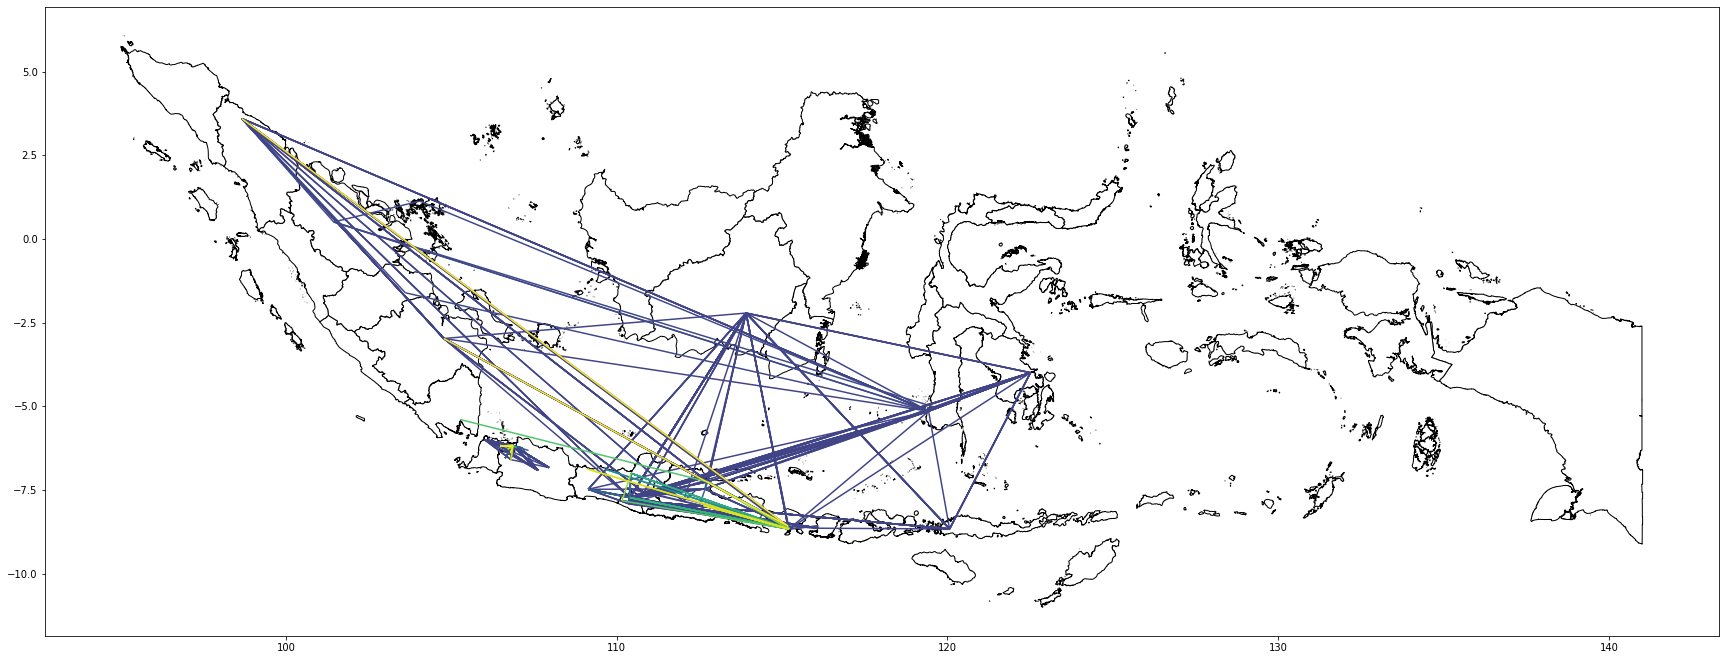

Wall time: 10min 56s


In [566]:
%%time
ax = indonesia_gdf.plot(color='white', edgecolor='black',figsize=(30,30))

traj_collection_from_jabodetabek.plot(ax=ax, column='trajectory_id')
traj_collection_to_jabodetabek.plot(ax=ax, column='trajectory_id')
plt.show()

In [233]:
import pandas as pd

mydictionary = {'id': ['11X', '11X', '22X', '33A'],
                'grade': [68, 74, 77, 78],
                'checkdate': ["2019-12-26", "2019-12-27", "2019-12-26", "2019-12-25"]}

df = pd.DataFrame(mydictionary)

df['checkdate'] = pd.to_datetime(df['checkdate'])
df2 = df.sort_values(by=['checkdate']).drop_duplicates('id', keep='last')
print(df2)

    id  grade  checkdate
3  33A     78 2019-12-25
2  22X     77 2019-12-26
1  11X     74 2019-12-27


In [235]:
df

,id,grade,checkdate
0,11X,68,2019-12-26
1,11X,74,2019-12-27
2,22X,77,2019-12-26
3,33A,78,2019-12-25
